<div>
<img src="img/circle_overlap.png" width="600" height="400"/>
</div>

In [106]:
from typing import List, Tuple

class Circle:
    def __init__(self, 
                 x: float, 
                 y: float, 
                 radius: float,
                 x_bounds: Tuple[float, float]):
        self.x = x
        self.y = y
        self.radius = radius
        
# Algorithm
# if outer arc is within left and right bounds, you know they overlap

        
def get_largest_area_circles(arr: List[Tuple[int, float]]) -> List[Tuple[int, float]]:
    if len(arr) < 2:
        return arr
    
    # Ensure x order for circles to cover for adjacent circles
    
    arr.sort(key=lambda circle: circle[0])
    
    res = list()
    
    circle_overlap_chain = [arr[0]]
    
    for cur_circle in arr[1:]:
        x, y, radius = cur_circle
        base_x, base_y, base_radius = circle_overlap_chain[-1]
        base_x_bounds, base_y_bounds = calculate_bounds(base_x, base_y, base_radius)
        
        cur_x_bounds, cur_y_bounds = calculate_bounds(x, y, radius)

        if base_x_bounds[0] <= cur_x_bounds[0] <= base_x_bounds[1] or \
            base_x_bounds[0] <= cur_x_bounds[1] <= base_x_bounds[1] or \
            base_y_bounds[0] <= cur_y_bounds[0] <= base_y_bounds[1] or \
            base_y_bounds[0] <= cur_y_bounds[1] <= base_y_bounds[1]:
            circle_overlap_chain.append((x, y, radius))
            continue
            
        if circle_overlap_chain:
            print('enter')
            print(cur_circle)
            print(circle_overlap_chain)
            print(res)
            if len(circle_overlap_chain) == 1:
                print('what')
                max_circle = circle_overlap_chain.pop()
                res.append(max_circle)
            else:
                max_circle = circle_overlap_chain.pop()
                max_area = get_area(max_circle[2])

                for i in range(1, len(circle_overlap_chain)):
                    chain_circle = circle_overlap_chain.pop()
                    chain_radius = chain_circle[2]
                    cur_area = get_area(chain_radius)
                    # largest area should be stored

                    if max_area < cur_area:
                        max_circle = chain_circle
                        max_area = cur_area
                #print(max_circle)
                res.append(max_circle)
            
        circle_overlap_chain.append((x, y, radius))
        # res.append((x, y, radius))
    
    print('out')
    print(circle_overlap_chain)
    if circle_overlap_chain:
        print('enter')
        print(cur_circle)
        print(circle_overlap_chain)
        print(res)
        if len(circle_overlap_chain) == 1:
            print('what')
            max_circle = circle_overlap_chain.pop()
            res.append(max_circle)
        else:
            max_circle = circle_overlap_chain.pop()
            max_area = get_area(max_circle[2])

            for i in range(1, len(circle_overlap_chain)):
                circle = circle_overlap_chain.pop()
                radius = circle[2]
                cur_area = get_area(radius)
                # largest area should be stored

                if max_area < cur_area:
                    max_circle = circle
                    max_area = cur_area
            #print(max_circle)
            res.append(max_circle)
    
    print(f'Res: {res}')
    
    return res

"""
            for o_x, o_y, o_r in circle_overlap:
                prior_area = get_area(res[-1][2])
                cur_area = get_area(o_r)
                # largest area should be stored
                if prior_area < cur_area:
                    res.pop()
                    res.append((x, y, radius))
"""
def get_area(radius: float):
    return radius**2


def calculate_bounds(x: float, y: float, radius: float):
    left_x_bound = x - radius
    right_x_bound = x + radius

    lower_y_bound = y - radius
    upper_y_bound = y + radius
    
    return (left_x_bound, right_x_bound), (lower_y_bound, upper_y_bound)

In [125]:
def get_largest_area_circles(arr: List[Tuple[int, float]]) -> List[Tuple[int, float]]:
    if not arr or len(arr) < 2:
        return arr
    
    # Ensure x sorted order for circles to put chained circle adjacent with one another
    arr.sort(key=lambda circle: circle[0])
    
    res = list()
    
    circle_overlap_chain = [arr[0]]
    
    for cur_circle in arr[1:]:
        prior_x, prior_y, prior_radius = circle_overlap_chain[-1]
        x, y, radius = cur_circle
        
        if is_circle_overlap(prior_x, prior_y, prior_radius, x, y, radius):
            circle_overlap_chain.append(cur_circle)
            continue
            
        if circle_overlap_chain:
            largest_circle = get_max_area_circle(circle_overlap_chain, res)
            res.append(largest_circle)
        
        circle_overlap_chain.append(cur_circle)
        
    # Catch tail in case there is an overlap chain leftover
    if circle_overlap_chain:
        largest_circle = get_max_area_circle(circle_overlap_chain, res)
        res.append(largest_circle)
        
    print(res)
    return res

def get_max_area_circle(circle_overlap_chain: List[Tuple[float, float, int]], 
                        res: List[Tuple[float, float, int]]) -> None:
    
    if len(circle_overlap_chain) == 1:
        return circle_overlap_chain.pop()

    max_circle = circle_overlap_chain.pop()
    max_area = get_area(max_circle[2])

    for i in range(1, len(circle_overlap_chain)):
        chain_circle = circle_overlap_chain.pop()
        chain_radius = chain_circle[2]
        cur_area = get_area(chain_radius)
        # largest area should be stored

        if max_area < cur_area:
            max_circle = chain_circle
            max_area = cur_area
    #print(max_circle)
    return max_circle
        
import math
def is_circle_overlap(x1: float, y1: float, radius1: float,
                      x2: float, y2: float, radius2: float) -> bool:
    """
    Assume circle overlap means there is a covered overlap region
    Touching isn't included but can be by changing the boolean evaluation 
    from dist < total_radius to dist <= total_radius
    
    Distance formula from two circle centers is used to prove whether theres any overlap
    against sum of the two radiuses
    dist < r1+r2 -> overlap
    dist == r1+r2 -> touching
    dist > r1+r2 -> disjoint circles - no overlap
    """
    # distance between circle centers
    dist = math.sqrt((x1-x2)**2 + (y1-y2)**2)
    
    total_radius = radius1 + radius2
    print((dist, total_radius))
    return dist < total_radius

def get_area(radius: float):
    return radius**2

In [126]:
arr = [(0.5, 0.5, 0.5), (1.5, 1.5, 1.1), (0.7, 0.7, 0.4), (4, 4, 0.7)]

# The bottom left circles form a cluster. Red circles are removed.
expected = [(1.5, 1.5, 1.1), (4, 4, 0.7)]

assert get_largest_area_circles(arr) == expected

(0.28284271247461895, 0.9)
(1.1313708498984762, 1.5)
(3.5355339059327378, 1.8)
[(1.5, 1.5, 1.1), (4, 4, 0.7)]


In [127]:
arr = [(1.5, 1.5, 1.3), (4, 4, 0.7)]

# No clusters are found and no circles are removed
expected = [(1.5, 1.5, 1.3), (4, 4, 0.7)]

assert get_largest_area_circles(arr) == expected

(3.5355339059327378, 2.0)
[(1.5, 1.5, 1.3), (4, 4, 0.7)]


In [128]:
arr = [(1, 3, 0.7), (2, 3, 0.4), (3, 3, 0.9)]

# The three circles form a cluster. Red circles are removed.
expected = [(3, 3, 0.9)]

assert get_largest_area_circles(arr) == expected

(1.0, 1.1)
(1.0, 1.3)
[(3, 3, 0.9)]


In [129]:
arr = [(4, 4, 0.7), (1.5, 1.5, 1.1), (0.7, 0.7, 0.4), (0.5, 0.5, 0.5)]

# The bottom left circles form a cluster. Red circles are removed.
expected = [(1.5, 1.5, 1.1), (4, 4, 0.7)]

assert get_largest_area_circles(arr) == expected

(0.28284271247461895, 0.9)
(1.1313708498984762, 1.5)
(3.5355339059327378, 1.8)
[(1.5, 1.5, 1.1), (4, 4, 0.7)]


In [133]:
arr = [(3, 1.5, 1), (1.5, 1.5, 1.1), (0.7, 0.7, 0.4), (0.5, 0.5, 0.5)]

# The bottom left circles form a cluster. Red circles are removed.
expected = [(1.5, 1.5, 1.1), (4, 4, 0.7)]

assert get_largest_area_circles(arr) == expected

(0.28284271247461895, 0.9)
(1.1313708498984762, 1.5)
(1.5, 2.1)
[(1.5, 1.5, 1.1)]


AssertionError: 

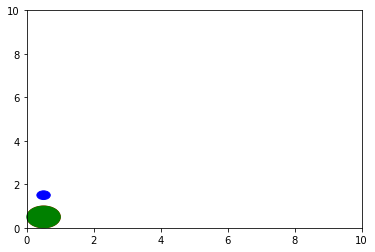

In [139]:
import matplotlib.pyplot as plt

circle1 = plt.Circle((0.5, 0.5), 0.5, color='r')
circle2 = plt.Circle((0.5, 1.5), 0.2, color='blue')
circle3 = plt.Circle((0.5, 0.5), 0.5, color='g', clip_on=False)

fig, ax = plt.subplots() 
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)